MSE: 0.3918


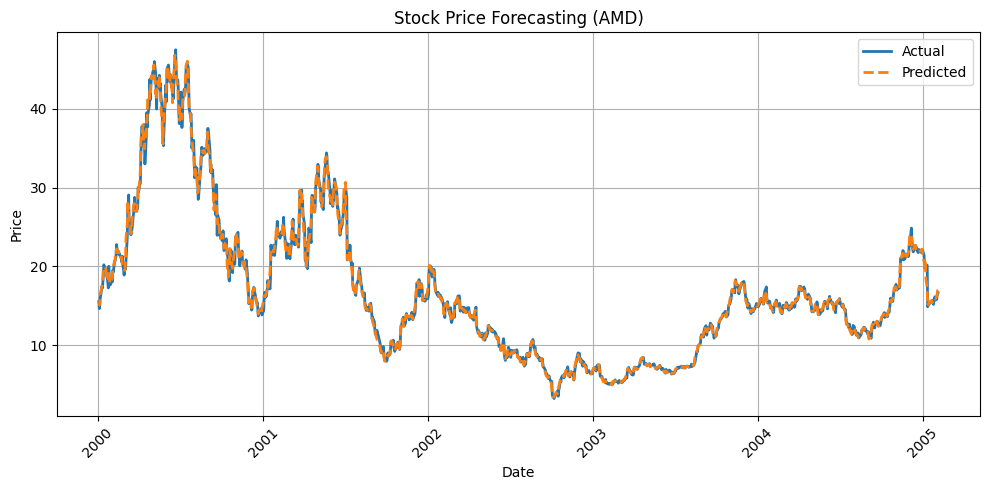

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df = pd.read_csv("World-Stock-Prices-Dataset.csv")
df['Date'] = pd.to_datetime(df['Date'], utc=True)
df.set_index('Date', inplace=True)

stock_df = df[df['Ticker'] == 'AMD'].copy()

if stock_df.empty:
    raise ValueError("No data found for AMD in the dataset!")

stock_df = stock_df[['Close']].dropna()
stock_df['MA3'] = stock_df['Close'].rolling(window=3).mean()
stock_df['MA5'] = stock_df['Close'].rolling(window=5).mean()
stock_df['Lag1'] = stock_df['Close'].shift(1)

stock_df.dropna(inplace=True)

if stock_df.empty:
    raise ValueError("All rows were removed after dropna(). Check data quality or try different window sizes.")

X = stock_df[['MA3', 'MA5', 'Lag1']]
y = stock_df['Close']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

model = SVR(kernel='rbf', C=100, gamma=0.1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.4f}")

sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='📉 Actual Price', color='#1f77b4', linewidth=2.5)
plt.plot(y_test.index, y_pred, label='🔮 Predicted Price', color='#ff7f0e', linestyle='--', linewidth=2.5)

plt.title('📈 AMD Stock Price Forecasting using SVR', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price (USD)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
